# Лабораторна робота №1
## Класифікація зображень за допомогою PyTorch

**Мета роботи: Навчитись тренувати базову нейронну мережу для класифікації зображень.**

**Вимоги:**

1.   Встановлені Python та бібліотеки PyTorch, torchvision, matplotlib.
2.   Завантажений набір даних CIFAR-10.

## Завдання до лабораторної роботи (частина І): Робота з даними (CIFAR-10)

1.   Імпортуйте необхідні бібліотеки:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from torch.utils.data import DataLoader, random_split
from torchvision.utils import make_grid

2.   Завантаження даних. Напишіть функцію, яка завантажує набір даних CIFAR-10.
3.   Перевірка наявності даних. Напишіть код, який перевіряє, чи дані завантажені та розпаковані успішно. Виведіть повідомлення про статус завантаження.
4.   Підготовка даних. Напишіть код, щоб імплементувати трансформації для зображень:
*    перетворення в тензори;
*    денормалізація (при необхідності).  

In [4]:
transform_train_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
data_train = torchvision.datasets.CIFAR10(root='data/raw', train=True, transform=transform_train_data, download=True)
data_test = torchvision.datasets.CIFAR10(root='data/raw', train=False, transform=transform_test_data, download=True)

In [6]:
print(f"Amount of pictures in train: {len(data_train)}")
print(f"Amount of pictures in test: {len(data_test)}")

Amount of pictures in train: 50000
Amount of pictures in test: 10000


Використайте `torchvision.transforms` для підготовки даних.

5.   Створення DataLoader. Створіть DataLoader для навчального та тестового наборів даних, щоб спростити процес завантаження даних за батчами.
6.   Візуалізація прикладів:
*   напишіть функцію для візуалізації деяких зображень з набору даних;
*   відобразіть кілька зображень з їхніми реальними мітками.

In [7]:
train_loader = DataLoader(data_train, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(data_test, batch_size=64, shuffle=False, num_workers=2)

In [8]:
train_images, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_images.size()}")
print(f"Labels batch shape: {train_labels.size()}")

random_images_indices = np.random.choice(len(train_images), 5, replace=False)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7019608].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.85882354..0.78039217].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7647059..0.9529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92941177..0.9137255].


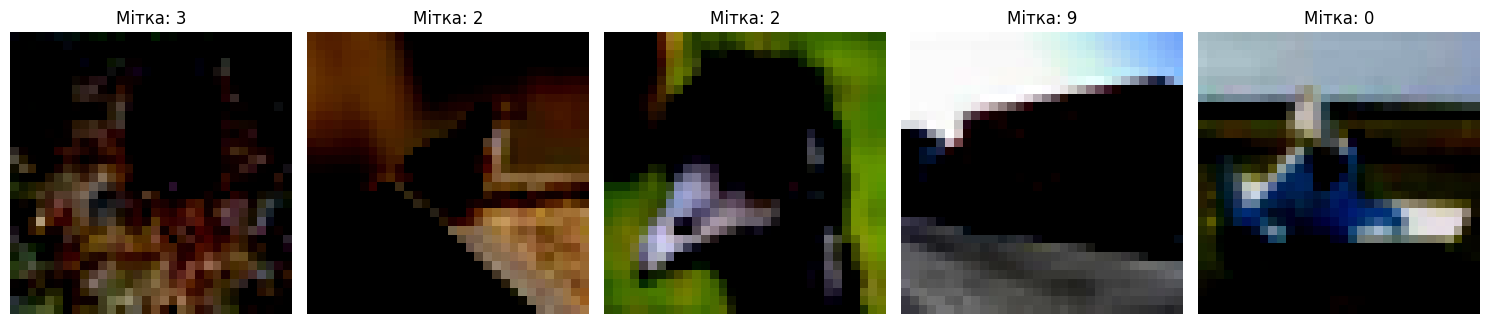

In [9]:
plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_images_indices):
    image = train_images[idx]
    label = train_labels[idx]
    
    image = image.numpy()
    
    if image.ndim == 3 and image.shape[0] in [1, 3]:
        image = np.transpose(image, (1, 2, 0))
        if image.shape[2] == 1:
            image = image.squeeze(axis=2)
    
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
    plt.title(f"Мітка: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

7.   Ваші висновки до частини І.

### Висновки до частини I

Було імлплементовано трансформації з перетворенням зоображень на тензори та нормалізації, потім за допомогою пакетів pytorch було викачано датасет CIRAF10. Також було створено Dataloader класи для контролю над батачами які потім будуть використовуватися для тренування. Поки число батчів було обране мною з голови, але пізніше з використання крос валідації буде обране найкраще, що буде задовільняти трейд-офф якості та обчислювальних ресурсів. Так само з Data Augmentation.

## Завдання до лабораторної роботи (частина ІІ):
0. Розділіть набір даних на навчальний і тестовий.
1. Визначення структури CNN.
    - Створіть клас для цільної нейронної мережі, яка буде містити мінімум два повнозв'язних шари.
2. Вибір функції втрати та оптимізатора:
    - визначте функцію втрат (наприклад, CrossEntropyLoss) та оптимізатор (наприклад, SGD або Adam).
3. Тренування моделі.
    - Реалізуйте цикл навчання, де:
        - модель тренується на навчальному наборі даних;
        - виводиться значення функції втрат та точність (на навчальній та валідаційній множинах) після кожної епохи.
4. Оцінка моделі:
    - визначте точність моделі на тестовому наборі даних;
    - виведіть детальні статистики (загальна точність та точність для кожного класу).
5. Візуалізація результатів:
    - візуалізуйте кілька випадкових передбачених зображень разом з їхніми реальними мітками та передбаченнями;
    - побудуйте графік точності та втрат для навчального набору даних на кожній епосі.

## Додаткові завдання (за бажанням):

- Напишіть код, який виведе кількість зображень у кожному класі в директорії train. Для цього ви можете використовувати os.listdir() для підрахунку зображень у відповідних піддиректоріях.
- Створіть графік (наприклад, гістограму), який відображає кількість зображень в кожному класі. Ви можете використовувати бібліотеку matplotlib для візуалізації.
- Виведіть кілька випадкових зображень з кожного класу разом із їхніми мітками.
- Дослідіть, як зміна параметрів підготовки даних (наприклад, різні трансформації) впливає на результати моделі.
- Спробуйте змінити архітектуру моделі (додати додаткові шари) та проаналізуйте, як це впливає на результати.
- Включіть регуляризацію (наприклад, Dropout) для покращення загальної точності.
